In [1]:
import glob 
import numpy as np

import cartopy.crs as ccrs
import cartopy.feature as cf
import intake
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr

import easygems.healpix as egh
import os

savedir = '/home/users/train045/Documents/WCRP25_hackathon/figs/D4/'

/home/users/train045/miniforge3/envs/wcrp_hackathon/lib/python3.12/site-packages/pyproj/network.py:59: UserWarning: pyproj unable to set PROJ database path.
  _set_context_ca_bundle_path(ca_bundle_path)


### extreme updrafts of the globe

#### daily

In [2]:
p = 8
fdir = f'/work/scratch-nopw2/train045/ral3/v3/extreme_updrafts_zoom10/count_{p}ms/'
files = sorted(glob.glob(fdir + '*'))
li = []
for f in files:
    d = xr.open_zarr(f)
    li.append(d)

In [3]:
ds = sum(li)

/home/users/train045/miniforge3/envs/wcrp_hackathon/lib/python3.12/site-packages/numpy/_core/numeric.py:353: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(a, fill_value, casting='unsafe')


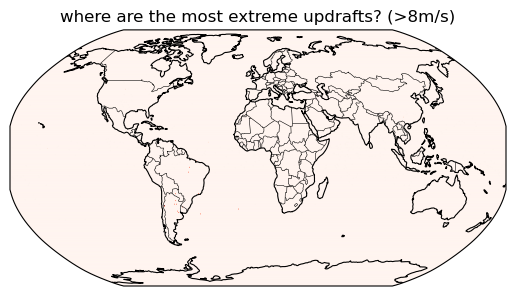

In [4]:
# view one instant of max updrafts

# Oxford coods (51 N, 15 W)
cmap = plt.get_cmap('Reds')
cmap.set_under = 'white'

projection = ccrs.Robinson(central_longitude=0)
fig, ax = plt.subplots(subplot_kw={'projection': projection}, )
ax.set_extent([-180,180,-90,90], crs=ccrs.PlateCarree())

shw = egh.healpix_show(ds.wa, ax=ax, cmap=cmap, vmin=0.1, )

# fig.colorbar(p, shrink=.6)
ax.set_title(f'where are the most extreme updrafts? (>{p}m/s)')

# fig.colorbar(shw)

ax.add_feature(cf.COASTLINE, linewidth=0.8)
ax.add_feature(cf.BORDERS, linewidth=0.4)

fig.savefig(savedir + f'daily-where_are_most_extreme_{p}ms-n{len(files)}.jpg', dpi=100)

#### tstep

In [3]:
p = '5'
fdir = f'/work/scratch-nopw2/train045/ral3/extreme_wmax_zoom10/count_exceedances/wmax{p}/'
files = glob.glob(fdir + '/*.zarr')
len(files)

97

In [4]:
li = []
count = 0
for f in files:
    d = xr.open_zarr(f)
    li.append(d)
    if count:
        result = result + d.wa
    else:
        result = d.wa
    print(count)
    count +=1

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96


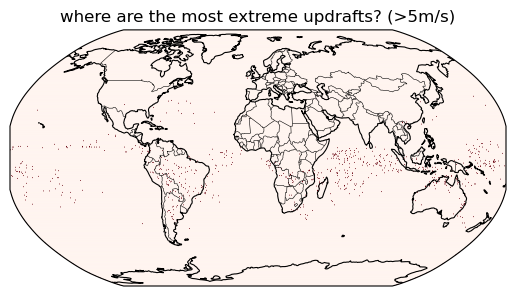

In [8]:
# view one instant of max updrafts

# Oxford coods (51 N, 15 W)
cmap = plt.get_cmap('Reds')
cmap.set_under = 'white'

projection = ccrs.Robinson(central_longitude=0)
fig, ax = plt.subplots(subplot_kw={'projection': projection}, )
ax.set_extent([-180,180,-90,90], crs=ccrs.PlateCarree())

shw = egh.healpix_show(result, ax=ax, cmap=cmap, vmin=0.1, )

# fig.colorbar(p, shrink=.6)
ax.set_title(f'where are the most extreme updrafts? (>{p}m/s)')

# fig.colorbar(shw)

ax.add_feature(cf.COASTLINE, linewidth=0.8)
ax.add_feature(cf.BORDERS, linewidth=0.4)

fig.savefig(savedir + f'where_are_most_extreme_{p}ms.jpg', dpi=100)

In [17]:
# get non zero cells indexes, scatter them

In [18]:
# cells = result.cell.where(result>0).dropna('cell')

In [21]:
# # view one instant of max updrafts

# # Oxford coods (51 N, 15 W)

# projection = ccrs.Robinson(central_longitude=0)
# fig, ax = plt.subplots(subplot_kw={'projection': projection}, )
# ax.set_extent([-180,180,-90,90], crs=ccrs.PlateCarree())

# p = egh.healpix_show(result, ax=ax, cmap='Reds', vmin=0, )

# for c in cells:
#     ax.scatter(c, marker='v')

# # fig.colorbar(p, shrink=.6)
# ax.set_title('where are the most extreme updrafts? (>8m/s)')

# ax.add_feature(cf.COASTLINE, linewidth=0.8)
# ax.add_feature(cf.BORDERS, linewidth=0.4)

# fig.savefig(savedir + f'where_are_most_extreme_8ms.jpg', dpi=100)

### checks

In [7]:
file = f'/work/scratch-nopw2/train045/ral3/wmax_percentiles_zoom10/pi99.5.zarr'
pi = xr.open_zarr(file)

In [5]:
di = {'test':1}
for k, v in di.items():
    print(k,v)

test 1


### CMF integrated

In [18]:
files = glob.glob('/work/scratch-nopw2/train045/cmf/I*/*.zarr')
len(files)

96

In [19]:
li = []
for f in files:
    d = xr.open_zarr(f).rename({'__xarray_dataarray_variable__':'cmfi'})
    li.append(d)
ds = xr.concat(li, dim='time')

In [ ]:
# view tropics PDF

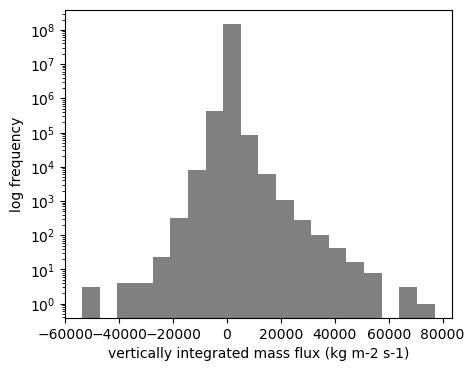

In [38]:
# plot

fig, ax = plt.subplots(1,1, figsize=(5,4))

def plot_ax(ax, da):
    da.plot.hist(bins=20, color='grey')
    ax.set_title('')
    ax.set_xlabel('vertically integrated mass flux (kg m-2 s-1)')
    ax.set_yscale('log')
    ax.set_ylabel('log frequency')
    return ax

ax = plot_ax(ax, ds.cmfi)
ax.set_title(f'')

fig.savefig(savedir + f'aug_integrated_cmf_tropics.jpg')

In [30]:
# get on global grid
cat = intake.open_catalog('https://digital-earths-global-hackathon.github.io/catalog/catalog.yaml')['online']
global_ = cat['icon_d3hp003aug'](zoom=9, time='PT15M').to_dask().pipe(egh.attach_coords).ts.isel(time=0)
da = xr.Dataset(coords=global_.coords)
da['tropics_mask'] = global_.cell.isin(ds.cell)
da['cell'] = da.cell
da = xr.merge((da, ds.cmfi), ).cmfi.mean('time')

/home/users/train045/miniforge3/envs/wcrp_hackathon/lib/python3.12/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
/home/users/train045/miniforge3/envs/wcrp_hackathon/lib/python3.12/site-packages/dask/array/core.py:4988: PerformanceWarning: Increasing number of chunks by factor of 32
  result = blockwise(


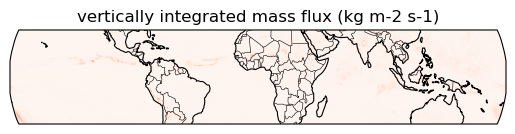

In [37]:
# view tropics

# Oxford coods (51 N, 15 W)
cmap = plt.get_cmap('Reds')
cmap.set_under = 'white'

projection = ccrs.Robinson(central_longitude=0)
fig, ax = plt.subplots(subplot_kw={'projection': projection}, )
ax.set_extent([-180,180,-30,30], crs=ccrs.PlateCarree())

shw = egh.healpix_show(da, ax=ax, cmap=cmap, vmin=0.1, )

# fig.colorbar(p, shrink=.6)
ax.set_title(f'vertically integrated mass flux (kg m-2 s-1)')

# fig.colorbar(shw)

ax.add_feature(cf.COASTLINE, linewidth=0.8)
ax.add_feature(cf.BORDERS, linewidth=0.4)

fig.savefig(savedir + f'aug_tropical_cmfi_z9.jpg', dpi=100, bbox_inches='tight')

In [ ]:
# view 3D tropics PDF

In [13]:
files = glob.glob('/work/scratch-nopw2/train045/cmf/*hist*/time*.npy')
li = []
for f in files:
    d = np.load(f)
    li.append(d)
hist = sum(li)
bins = np.load(glob.glob('/work/scratch-nopw2/train045/cmf/*hist*/bins.npy')[0])

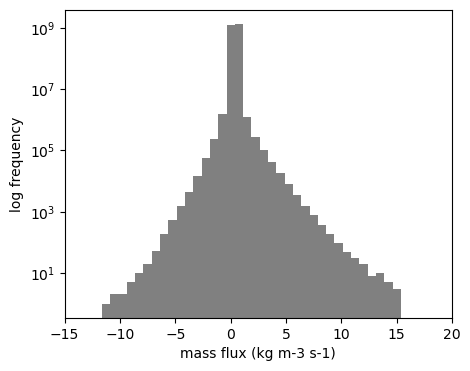

In [39]:
fig, ax = plt.subplots(1,1, figsize=(5,4))

def plot_ax(ax, hist, bin_edges):
    ax.bar(bin_edges[:-1], hist, width=np.diff(bin_edges), color='grey')
    ax.set_title('')
    ax.set_xlabel('mass flux (kg m-3 s-1)')
    ax.set_yscale('log')
    ax.set_ylabel('log frequency')
    return ax

ax = plot_ax(ax, hist, bins[::-1])
ax.set_title(f'')
ax.set_xlim((-15,20))

fig.savefig(savedir + f'aug_3d_cmf_tropics.jpg')

### all velocities

In [23]:
zooms = (6,9,11)
results = {}
for zoom in zooms:
    files = glob.glob(f'/work/scratch-nopw2/train045/whist_zoom{zoom}/time_*.npy')
    arr = np.zeros(40)
    for f in files:
        arr = np.sum((arr, np.load(f)), axis=0)
    hist = arr
    bins = np.load(f'/work/scratch-nopw2/train045/whist_zoom{zoom}/bins.npy')
    results[zoom] = (hist, bins)

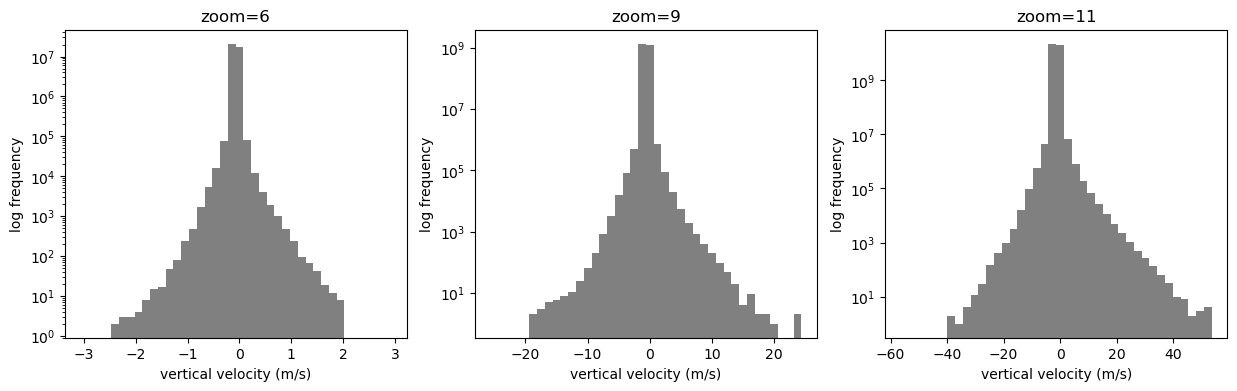

In [27]:
# compare

fig, axs = plt.subplots(1,3, figsize=(15,4))

def plot_ax(ax, hist, bin_edges, c='grey'):
    ax.bar(bin_edges[:-1], hist, width=np.diff(bin_edges), color=c)
    ax.set_title('')
    ax.set_xlabel('vertical velocity (m/s)')
    ax.set_yscale('log')
    ax.set_ylabel('log frequency')
    return ax

for i,ax in enumerate(axs):
    zoom = zooms[i]
    d = results[zoom]
    ax = plot_ax(ax, *d)
    ax.set_title(f'zoom={zoom}')

fig.savefig(savedir + f'all_velocities_hist_tropics-res_comparison.jpg')